# SVM 的理解

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC # 分类算法
from sklearn import datasets

## 创造数据

(100, 2)

(100,)

array([0, 1])

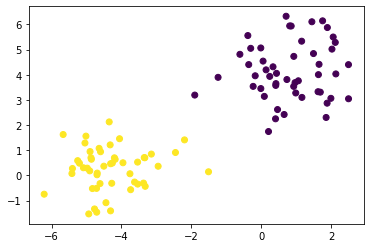

In [2]:
X,y = datasets.make_blobs(n_samples=100,# 样本量
                    n_features=2,# 二维数据，便于画图展示
                    centers=2,# 两类
                    random_state=3)# 随机数状态，固定了
display(X.shape,y.shape,np.unique(y))

plt.scatter(X[:,0],X[:,1],c=y)

## 算法建模

In [3]:
svc = SVC(kernel = 'linear') # kernel 表示核函数：linear，线性

svc.fit(X,y)

SVC(kernel='linear')

In [4]:
svc.score(X,y)

1.0

## 绘制分割线

In [5]:
w_ = svc.coef_# 特征两个
w_

array([[-0.69194716, -1.00958201]])

In [6]:
b_ = svc.intercept_
b_

array([0.90732128])

𝑦=−𝑤1𝑤2𝑥−𝑏𝑤2

In [7]:
w = - w_[0,0]/w_[0,1]
w

-0.6853798435538032

In [8]:
b, = - b_/w_[0,1]
b

0.8987098253546204

In [10]:
sv = svc.support_vectors_
sv

array([[ 0.21219196,  1.74387328],
       [-1.8997797 ,  3.19111595],
       [-2.19341554,  1.41161044]])

𝑦=𝑤𝑥+𝑏
 
𝑏=𝑦−𝑤𝑥

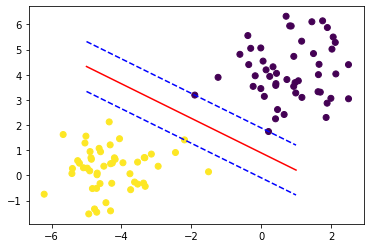

In [11]:
x = np.linspace(-5,1,100)

y_result = w * x + b

plt.scatter(X[:,0],X[:,1],c = y)

plt.plot(x,y_result,color = 'red')

# 上边界和下边界
b1 = sv[0][1] - w * sv[0][0]
plt.plot(x, w * x + b1 ,color = 'blue',ls = '--')

b2 = sv[-1][1] - w * sv[-1][0]
plt.plot(x, w * x + b2, color = 'blue', ls = '--')

# 使用 SVM 对数字1-9进行分类

## 导包

In [12]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA # 降维，减少数据的维度，特征（784像素，784个特征）

## 加载拆分数据

In [13]:
digits = pd.read_csv('./digits.csv')

index = np.random.randint(0,42000,size = 5000)

data = digits.take(index)

X = data.iloc[:,1:]
y = data['label']
display(X.shape,y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

display(X_train.head(),X_train.shape,y_train.shape,y_train.shape,y_test.shape)

(5000, 784)

(5000,)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(4500, 784)

(4500,)

(4500,)

(500,)

## 建模对比

### 逻辑回归

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
%%time
model = LogisticRegression(max_iter=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

CPU times: user 4.71 s, sys: 1.04 s, total: 5.75 s
Wall time: 869 ms


0.88

### SVM支持向量机

In [16]:
%%time
model = SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

CPU times: user 1.93 s, sys: 23.4 ms, total: 1.95 s
Wall time: 1.95 s


0.96

## 100次运算平均分

### 数据预处理

In [17]:
X.shape

(5000, 784)

In [18]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
import matplotlib.pyplot as plt

(784,)


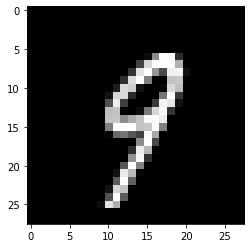

In [26]:
index = np.random.randint(0,5000,size = 1)[0]
index
num = X.iloc[index].values
print(num.shape)
plt.imshow(num.reshape(28,28),cmap='gray')

### PCA 降维

In [27]:
pca = PCA(n_components=0.95) # 降维算法，n_components = 0.95保留95%重要的信息

# 依然代表原来的数据
X_pca = pca.fit_transform(X)

X_pca.shape

(5000, 148)

### 逻辑斯蒂100次运算平均分

In [28]:
%%time
score = 0
for i in range(100):
    # 随机拆分
    X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.1)
    
    model = LogisticRegression()
    
    model.fit(X_train,y_train)
    
    score += model.score(X_test,y_test)/100
    
print('逻辑回归100次平均得分：',score)

逻辑回归100次平均得分： 0.8548000000000002
CPU times: user 3min 9s, sys: 43.4 s, total: 3min 52s
Wall time: 39.1 s


### 支持向量机100次运算平均分

In [29]:
%%time
score = 0
for i in range(100):
    
    X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.1)
    
    model = SVC()
    
    model.fit(X_train,y_train)
    
    score += model.score(X_test,y_test)/100
    
print('支持向量机100次平均得分：',score)

支持向量机100次平均得分： 0.9601199999999999
CPU times: user 1min 28s, sys: 440 ms, total: 1min 29s
Wall time: 1min 29s


In [30]:
try:
    print(10/0)
except Exception as e:
    print(e)

division by zero


# SVC核函数

## 导包

In [31]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 加载拆分数据

In [38]:
X,y = datasets.load_wine(return_X_y=True)
display(X.shape,y.shape)
np.unique(y)

(178, 13)

(178,)

array([0, 1, 2])

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(142, 13)

## 建模

### 线性:linear

In [34]:
svc = SVC(kernel = 'linear')

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('使用核函数为linear，得分是：',score)

svc.coef_

使用核函数为linear，得分是： 0.9722222222222222


array([[ 6.73164690e-01,  4.31113873e-01,  1.00829272e+00,
        -1.96935864e-01, -1.17047802e-02, -6.34658004e-02,
         1.50784829e-01,  2.27049049e-01, -1.16823925e-01,
         1.66262734e-01, -1.56872949e-01,  4.33543895e-01,
         8.58825478e-03],
       [-3.75414424e-03,  7.14230155e-03,  1.40663650e-01,
        -4.69969733e-02,  2.20766498e-03,  2.35410245e-01,
         4.28130355e-01, -1.79127258e-02,  1.73152768e-01,
        -8.74885021e-02,  1.02205705e-01,  4.15043584e-01,
         1.41912705e-03],
       [-5.09207976e-01, -3.13797928e-01, -4.57716391e-01,
         6.48781832e-02, -4.19821629e-02,  1.77254162e-01,
         1.51949229e+00,  1.82693557e-01,  1.47820493e-01,
        -9.54157338e-01,  4.29007172e-01,  5.92349012e-01,
        -2.15869317e-03]])

In [39]:
# 二维：shape = (3,13)
# 三分类问题--->三个方程
# 13个特征、属性，所以系数：13个
svc.coef_
svc.intercept_

array([-15.89829165,  -2.90927906,  13.10976344])

### poly多项式（方程幂次大于1的~）

In [41]:
svc = SVC(kernel = 'poly',degree=2) # 升维，将数据由少变多

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('使用核函数为poly，得分是：',score)

使用核函数为poly，得分是： 0.7222222222222222


### rbf高斯分布

In [42]:
svc = SVC(kernel = 'rbf') # 默认，一般这种核函数效果好，很多特征，属于正态分布

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

# 模型评估
score = accuracy_score(y_test, y_pred)
print('使用核函数为rbf，得分是：',score)

使用核函数为rbf，得分是： 0.6944444444444444


### sigmoid核函数

In [43]:
svc = SVC(kernel = 'sigmoid') 

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

# 模型评估
score = accuracy_score(y_test, y_pred)
print('使用核函数为sigmod，得分是：',score)

使用核函数为sigmod，得分是： 0.1111111111111111


## 非线性核函数

In [44]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### 创造数据

(100, 2)

(100,)

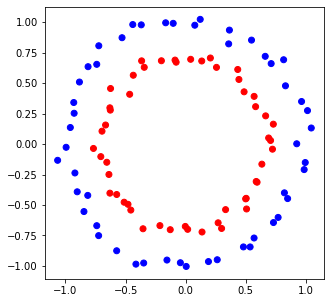

In [46]:
X,y = datasets.make_circles(n_samples=100,factor=0.7)

X += np.random.randn(100,2)*0.04

display(X.shape,y.shape)
plt.figure(figsize=(5,5))
cmap = ListedColormap(colors = ['blue','red'])
plt.scatter(X[:,0],X[:,1],c = y,cmap = cmap)

### 线性核函数¶

In [47]:
svc = SVC(kernel='linear')
svc.fit(X,y)
svc.score(X,y)

0.52

### 多项式poly（升维)

In [48]:
svc = SVC(kernel='poly',degree = 2)
svc.fit(X,y)
svc.score(X,y)

1.0

### rbf高斯核函数

In [49]:
svc = SVC(kernel='rbf')
svc.fit(X,y)
svc.score(X,y)

1.0

# 天猫双十一销量数据预测

## 导入包

In [2]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

## 支持向量机回归问题

### 创建数据

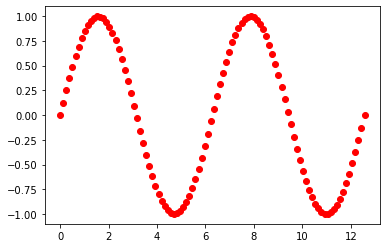

In [5]:
X = np.linspace(0,2*np.pi*2,100).reshape(-1,1)

y = np.sin(X)

plt.scatter(X,y,color ="r")

### 建模

#### 线性核函数

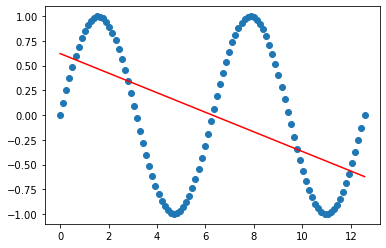

In [7]:
svr = SVR(kernel='linear')
svr.fit(X,y.ravel())

y_ = svr.predict(X)
plt.scatter(X,y)

# 绘制预测结果
plt.plot(X,y_,color = 'r')

#### poly多项式核函数

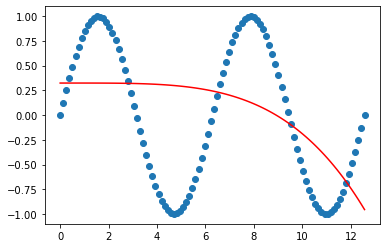

In [10]:
svr = SVR(kernel='poly',degree=4)
svr.fit(X,y.ravel())

y_ = svr.predict(X)
plt.scatter(X,y)

# 绘制预测结果
plt.plot(X,y_,color = 'red')

#### rbf径向基（高斯核函数）

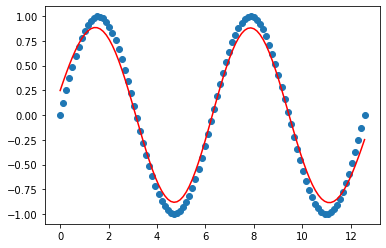

In [11]:
svr = SVR(kernel='rbf')
svr.fit(X,y.ravel())

y_ = svr.predict(X)
plt.scatter(X,y)

# 绘制预测结果
plt.plot(X,y_,color = 'red')

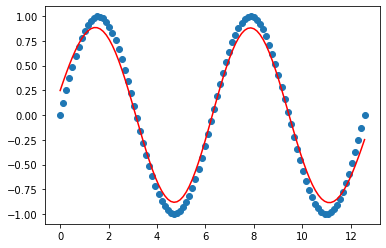

In [13]:
svr = SVR(kernel='rbf',coef0=2000,)
svr.fit(X,y.ravel())

y_ = svr.predict(X)
plt.scatter(X,y)

# 绘制预测结果
plt.plot(X,y_,color = 'red')

## 天猫双十一销量数据预测作业

### 数据创建

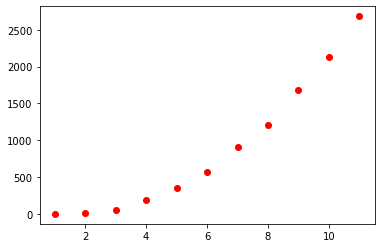

In [14]:
X = np.arange(2009,2020) - 2008

y = np.array([0.5,9.36,52,191,350,571,912,1207,1682,2135,2684])

plt.scatter(X,y,color = 'red')

In [15]:
# 划分份数多，画图，曲线平滑
X_test = np.linspace(2009,2019,100).reshape(-1,1) - 2008

### 线性核函数

array([[30.]])

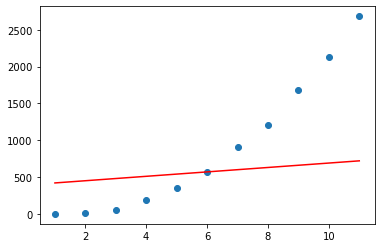

In [20]:
svr = SVR(kernel='linear')
svr.fit(X.reshape(-1,1),y)

y_ = svr.predict(X_test)
plt.scatter(X,y)

# 绘制预测结果
plt.plot(X_test,y_,color = "r")

svr.coef_

### rbf核函数

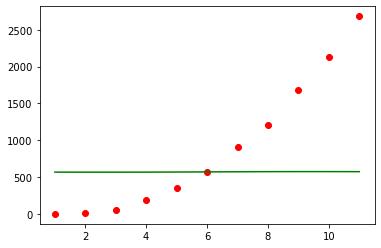

In [21]:
svr = SVR(kernel = 'rbf')
svr.fit(X.reshape(-1,1),y)

y_ = svr.predict(X_test)

plt.scatter(X,y,color = 'red')

plt.plot(X_test.ravel(),y_,color = 'green')

# svr.coef_  没有这个参数

### 多项式poly

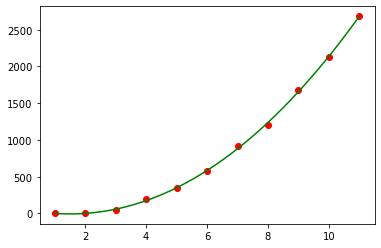

In [22]:
# coef --->coefficient 系数
# coef0 ---> bias，截距,w0
# w1，w2,w3,wn
svr = SVR(kernel = 'poly',coef0=200)
svr.fit(X.reshape(-1,1),y)

y_ = svr.predict(X_test)

plt.scatter(X,y,color = 'red')

plt.plot(X_test.ravel(),y_,color = 'green')
# svr.coef_  没有此参数